In [1]:
import numpy as np
import matplotlib as plt
import math
from scipy.optimize import minimize

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
X, y = load_iris(return_X_y=True)
print ("5 samples Iris data X = \n", X[:5][:])
print ("All Iris data y = \n", y)
#Use sklearn's library to split the data into training and testing sets with ratio 75% to 25%.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print("First 5 samples of X_train: \n", X_train[0:5, :])
print("First 5 samples of y_train: \n", y_train[0:5])

5 samples Iris data X = 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
All Iris data y = 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
First 5 samples of X_train: 
 [[5.9 3.  4.2 1.5]
 [5.8 2.6 4.  1.2]
 [6.8 3.  5.5 2.1]
 [4.7 3.2 1.3 0.2]
 [6.9 3.1 5.1 2.3]]
First 5 samples of y_train: 
 [1 1 2 0 2]


In [3]:
#Explain if want to normalize data
a = np.array([[1, 2], [3, 4]])
print("matrix a: \n", a)
print("Mean a: \n", np.mean(a))
print("matrix per column a: \n",np.mean(a, axis=0))
print("matrix per row a: \n",np.mean(a, axis=1))

matrix a: 
 [[1 2]
 [3 4]]
Mean a: 
 2.5
matrix per column a: 
 [2. 3.]
matrix per row a: 
 [1.5 3.5]


In [4]:
#do this part only if you want to normalize the data
#YOU NEED NOT NORMALIZE FOR IT TO WORK
X_av = np.mean(X_train, axis=0)
X_sd = np.std(X_train, axis=0)
X_train = (X_train - X_av)/X_sd
X_test = (X_test - X_av)/X_sd

#**Instead of using the Logistic Regression Library Function, let's do gradient descent calls ourselves.**

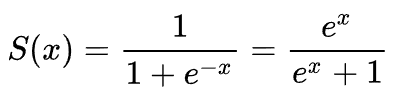

In [5]:
#input is a vector and returns a vector
def stable_sigmoid(x):
    sig = np.where(x < 0, np.exp(x)/(1 + np.exp(x)), 1/(1 + np.exp(-x)))
    return sig

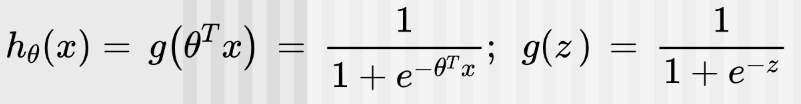

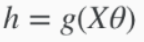

In [6]:
def h(theta, X): #theta is a n x 1 vector
  #X is a mxn matrix
  #  [x0 x1 ... x_n-1]_1 where n-1 is size of feature vector (no. features)
  #  [x0 x1 ... x_n-1]_2 REMEMBER x0 is 1.
  #  ...
  #  [x0 x1 ... x_n-1]_m where m is number of data points
  #for matrix X_mxn, and vector theta_nx1 this will return a vector mx1
  #print("shape X, theta = ", X.shape, theta.shape)
  z = X @ theta # X is m x n, theta is n x 1. Result z is mx1.
  return stable_sigmoid(z) #returns vector mx1

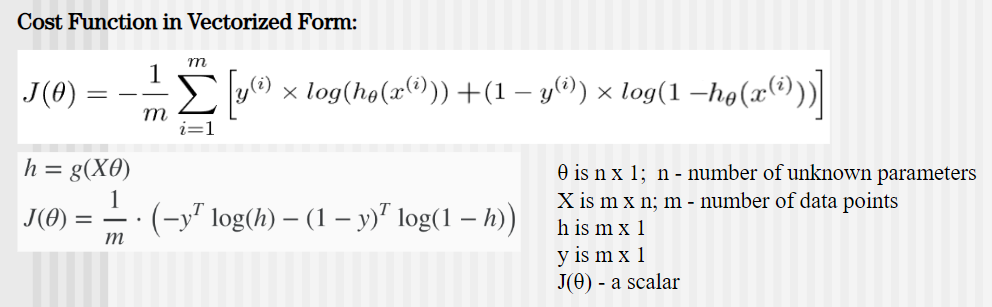

In [7]:
def J(theta, X, y):
  #X[i] is 1 data point
  #y = X @ theta where X is m x n and theta is n x 1. y is m x 1.
  #y[i] is 0 or 1 only for data belongs to this class or not this class
  #m is number of data points.  n is number of features
  #first column of X contain all 1's
  #Assume we have J = (-1/m)SUM_{i=1..m}[y_i * log(h(theta, X[i])) +
  #                                          (1-y_i)*log(1-h(theta, X[i])) ]
  m = X.shape[0] #m - number of data points
  n = X.shape[1] #n - no. features + 1, because first column X is all 1 for intercepts.
  H = h(theta, X)
  #print ("In function E, m, n = ", m, n, "y.shape = ", y.shape, "h shape = ", T1.shape)
  cost = -(y.T @ np.log(H) + (1-y).T @ np.log(1-H))/m
  return cost #returns a scalar

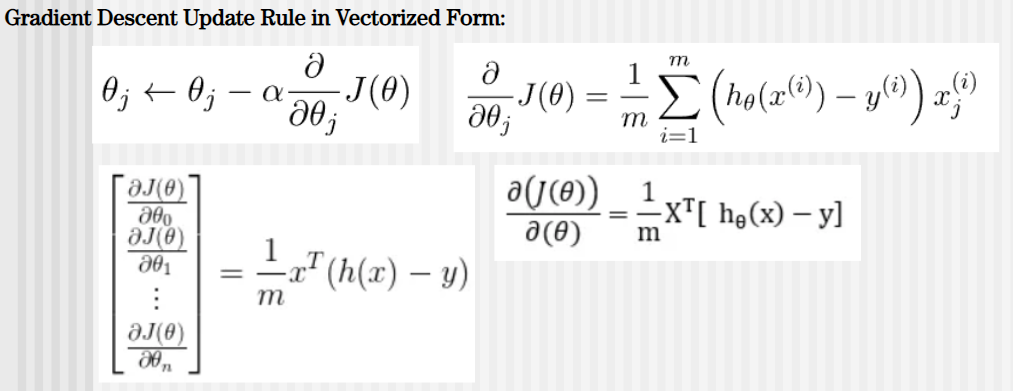

In [8]:
def dJ_d_theta(theta, X, y):
    m = X.shape[0] #m - number of data points
    n = X.shape[1] #n - no. features + 1, because first column X is all 1 for intercepts.
    dJ_dt = X.T @ (h(theta, X) - y)/m # this is n x m * m x 1 to get n x 1
    return dJ_dt #an array n x 1

In [9]:
m = X_train.shape[0] #m - number of data points
n = X_train.shape[1] + 1 #n - number of features + 1; 1 is for column of 1's.
#start with random values of solution theta, array values betweeen -10 to 10:
theta0 = 20* np.random.rand(n) - 10 #theta0 is 1 x n array of random values
theta = theta0.T #convert to vector (n x 1)

In [10]:
#set yN to 0 if y is not equal to N, 1 if y is equanl to N.
y0_train = (y_train==0)*1.0 #yes/no of class 0
y1_train = (y_train==1)*1.0 #yes/no of class 1
y2_train = (y_train==2)*1.0 #yes/no of class 2
y0_test = (y_test ==0)*1.0
y1_test = (y_test ==1)*1.0
y2_test = (y_test ==2)*1.0
print("y_test = \n",y_test)
print("y1_test = \n", y1_test) #note that in y0_test only y with class 0 are set to 1, others to 0.\

y_test = 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]
y1_test = 
 [0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1.]


In [11]:
X_1_train = np.ones([m,n]) #create an array of all 1's
print("X_1_Train 5 rows All 1s = \n",X_1_train[0:5,:])

X_1_train[:, 1:] = X_train #leave column 1 as 1's, and replace all other data with X_train

X_1_test = np.ones([X_test.shape[0],X_test.shape[1] + 1]) #create an array of all 1's
X_1_test[:, 1:] = X_test #leave column 1 as 1's, and replace all other data with X_test

print("X_Train 5 rows = \n",X_train[0:5,:])
print("X_1_Train 5 rows = \n",X_1_train[0:5,:])

X_1_Train 5 rows All 1s = 
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
X_Train 5 rows = 
 [[ 0.01543995 -0.11925475  0.22512685  0.35579762]
 [-0.09984503 -1.04039491  0.11355956 -0.02984109]
 [ 1.05300481 -0.11925475  0.95031423  1.12707506]
 [-1.36797986  0.34131533 -1.39259884 -1.31530348]
 [ 1.1682898   0.11103029  0.72717965  1.38416753]]
X_1_Train 5 rows = 
 [[ 1.          0.01543995 -0.11925475  0.22512685  0.35579762]
 [ 1.         -0.09984503 -1.04039491  0.11355956 -0.02984109]
 [ 1.          1.05300481 -0.11925475  0.95031423  1.12707506]
 [ 1.         -1.36797986  0.34131533 -1.39259884 -1.31530348]
 [ 1.          1.1682898   0.11103029  0.72717965  1.38416753]]


In [13]:
'''
  scipy.optimize.minimize(fun, x0, args=(), method='Nelder-Mead', bounds=None,
     tol=None, callback=None, options={'func': None, 'maxiter': None,
    'maxfev': None, 'disp': False, 'return_all': False, 'initial_simplex': None,
    'xatol': 0.0001, 'fatol': 0.0001, 'adaptive': False})
'''
res0 = minimize(J, theta, args = (X_1_train, y0_train), method='BFGS', jac=dJ_d_theta, options={'disp': True})
theta_solved0 = res0.x
print("Class 0 best fit parameters theta 0, 1, 2,..., n-1:", theta_solved0)

         Current function value: nan
         Iterations: 2
         Function evaluations: 14
         Gradient evaluations: 14
Class 0 best fit parameters theta 0, 1, 2,..., n-1: [ 0.80628177  0.3724609   6.71956826 -7.3503687  -5.59879044]


<ipython-input-7-d49448c433e7>:13: RuntimeWarning: divide by zero encountered in log
  cost = -(y.T @ np.log(H) + (1-y).T @ np.log(1-H))/m
<ipython-input-7-d49448c433e7>:13: RuntimeWarning: invalid value encountered in matmul
  cost = -(y.T @ np.log(H) + (1-y).T @ np.log(1-H))/m
<ipython-input-7-d49448c433e7>:13: RuntimeWarning: divide by zero encountered in log
  cost = -(y.T @ np.log(H) + (1-y).T @ np.log(1-H))/m
<ipython-input-7-d49448c433e7>:13: RuntimeWarning: invalid value encountered in matmul
  cost = -(y.T @ np.log(H) + (1-y).T @ np.log(1-H))/m
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


In [14]:
print("Show 10 rows of test data: \n", X_test[:10, :])
print("Target output of 10 rows of test data: \n", y0_test[:10])

Show 10 rows of test data: 
 [[-0.09984503 -0.57982483  0.72717965  1.51271377]
 [ 0.13072494 -1.96153508  0.11355956 -0.28693357]
 [-0.44569998  2.64416573 -1.33681519 -1.31530348]
 [ 1.62942973 -0.34953979  1.39658338  0.74143634]
 [-1.0221249   0.80188541 -1.28103155 -1.31530348]
 [ 0.47657989  0.57160037  1.22923245  1.64126001]
 [-1.0221249   1.03217045 -1.39259884 -1.18675724]
 [ 0.93771983  0.11103029  0.50404507  0.35579762]
 [ 1.05300481 -0.57982483  0.55982872  0.22725139]
 [ 0.24600992 -0.57982483  0.11355956  0.09870515]]
Target output of 10 rows of test data: 
 [0. 0. 1. 0. 1. 0. 1. 0. 0. 0.]


In [15]:
predict_y0_before =  h(theta_solved0, X_1_test) #values of probability
predict_y0 = (predict_y0_before > 0.5)*1.0 #threshold to 1 or 0

In [16]:
np.set_printoptions(precision=5,suppress=True) #print with 2 decimal places and suppress scientific notation
print("Prediction if class is 0 before threshold: \n", predict_y0_before)
print("Prediction if class is 0 after threshold: \n", predict_y0)
print("Target output of test data: \n", y0_test)


Prediction if class is 0 before threshold: 
 [0.      0.00001 1.      0.      1.      0.      1.      0.02198 0.00031
 0.0123  0.      0.17412 0.00145 0.0003  0.00161 1.      0.00171 0.00017
 1.      1.      0.      0.00673 1.      1.      0.00001 1.      1.
 0.01754 0.00052 1.      0.00009 0.00618 1.      0.00019 0.      0.00132
 1.      0.     ]
Prediction if class is 0 after threshold: 
 [0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.]
Target output of test data: 
 [0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.]


In [17]:
(predict_y0 == y0_test).sum()

38

In [18]:
correct0 = (((predict_y0 == y0_test).sum())/len(y0_test))*100
print("Correct percent for predicting class 0: %5.1f%%"%correct0)

Correct percent for predicting class 0: 100.0%


In [19]:
res1 = minimize(J, theta, args = (X_1_train, y1_train), method='BFGS', jac=dJ_d_theta, options={'disp': True})
theta_solved1 = res1.x
print("Class 1 best fit parameters theta 0, 1, 2,..., n-1:", theta_solved1)
predict_y1_before =  h(theta_solved1, X_1_test) #probability 0 - 1
predict_y1 = (predict_y1_before > 0.5)*1.0 #binary 0, 1
print("Show 10 rows of test data: \n", X_test[:10, :])
print("Target output of 10 rows of test data: \n", y1_test[:10])
np.set_printoptions(precision=2,suppress=True) #print with 2 decimal places and suppress scientific notation
print("Prediction if class is 1 before threshold: \n", predict_y1_before)
print("Prediction if class is 1 after threshold: \n", predict_y1)
print("Target output of test data: \n", y1_test)
correct1 = (((predict_y1 == y1_test).sum())/len(y1_test))*100
print("Correct percent for predicting class 1: %5.1f%%"%correct1)

Optimization terminated successfully.
         Current function value: 0.476675
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Class 1 best fit parameters theta 0, 1, 2,..., n-1: [-1.16355 -0.4186  -1.07558  2.75059 -2.41157]
Show 10 rows of test data: 
 [[-0.09985 -0.57982  0.72718  1.51271]
 [ 0.13072 -1.96154  0.11356 -0.28693]
 [-0.4457   2.64417 -1.33682 -1.3153 ]
 [ 1.62943 -0.34954  1.39658  0.74144]
 [-1.02212  0.80189 -1.28103 -1.3153 ]
 [ 0.47658  0.5716   1.22923  1.64126]
 [-1.02212  1.03217 -1.3926  -1.18676]
 [ 0.93772  0.11103  0.50405  0.3558 ]
 [ 1.053   -0.57982  0.55983  0.22725]
 [ 0.24601 -0.57982  0.11356  0.09871]]
Target output of 10 rows of test data: 
 [0. 1. 0. 0. 0. 0. 0. 1. 1. 1.]
Prediction if class is 1 before threshold: 
 [0.1  0.87 0.01 0.64 0.12 0.07 0.06 0.24 0.5  0.36 0.89 0.17 0.69 0.39
 0.49 0.1  0.35 0.76 0.21 0.01 0.25 0.34 0.22 0.36 0.28 0.05 0.05 0.4
 0.74 0.08 0.33 0.36 0.09 0.23 0.26 0.41 0.04 0.62

In [20]:
res2 = minimize(J, theta, args = (X_1_train, y2_train), method='BFGS', jac=dJ_d_theta, options={'disp': True})
theta_solved2 = res2.x
print("Class 2 best fit parameters theta 0, 1, 2,..., n-1:", theta_solved2)
predict_y2_before =  h(theta_solved2, X_1_test)
predict_y2 = (predict_y2_before > 0.5)*1.0
print("Show 10 rows of test data: \n", X_test[:10, :])
print("Target output of 10 rows of test data: \n", y2_test[0:10])
np.set_printoptions(precision=1,suppress=True) #print with 2 decimal places and suppress scientific notation
print("Prediction if class is 2 before threshold: \n", predict_y2_before)
print("Prediction if class is 2 after threshold: \n", predict_y2)
print("Target output of 10 rows of test data: \n", y2_test)
correct2= (((predict_y2 == y2_test).sum())/len(y2_test))*100
print("Correct percent for predicting class 2: %5.1f%%"%correct2)

         Current function value: nan
         Iterations: 32
         Function evaluations: 61
         Gradient evaluations: 61
Class 2 best fit parameters theta 0, 1, 2,..., n-1: [-32.26  -3.4   -4.53  30.49  21.62]
Show 10 rows of test data: 
 [[-0.1  -0.58  0.73  1.51]
 [ 0.13 -1.96  0.11 -0.29]
 [-0.45  2.64 -1.34 -1.32]
 [ 1.63 -0.35  1.4   0.74]
 [-1.02  0.8  -1.28 -1.32]
 [ 0.48  0.57  1.23  1.64]
 [-1.02  1.03 -1.39 -1.19]
 [ 0.94  0.11  0.5   0.36]
 [ 1.05 -0.58  0.56  0.23]
 [ 0.25 -0.58  0.11  0.1 ]]
Target output of 10 rows of test data: 
 [1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
Prediction if class is 2 before threshold: 
 [1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  1.  0.  0.  0.  0.9 0.  0.  0.  0.  0.  1.  0.  0.  0.9 1.  0.
 0.  1. ]
Prediction if class is 2 after threshold: 
 [1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.]
Target output of 10 rows of test data: 
 [1. 0. 0

<ipython-input-7-d49448c433e7>:13: RuntimeWarning: divide by zero encountered in log
  cost = -(y.T @ np.log(H) + (1-y).T @ np.log(1-H))/m
<ipython-input-7-d49448c433e7>:13: RuntimeWarning: invalid value encountered in matmul
  cost = -(y.T @ np.log(H) + (1-y).T @ np.log(1-H))/m
<ipython-input-5-bf12298fe843>:3: RuntimeWarning: overflow encountered in exp
  sig = np.where(x < 0, np.exp(x)/(1 + np.exp(x)), 1/(1 + np.exp(-x)))
<ipython-input-5-bf12298fe843>:3: RuntimeWarning: invalid value encountered in divide
  sig = np.where(x < 0, np.exp(x)/(1 + np.exp(x)), 1/(1 + np.exp(-x)))
<ipython-input-7-d49448c433e7>:13: RuntimeWarning: divide by zero encountered in log
  cost = -(y.T @ np.log(H) + (1-y).T @ np.log(1-H))/m
<ipython-input-7-d49448c433e7>:13: RuntimeWarning: invalid value encountered in matmul
  cost = -(y.T @ np.log(H) + (1-y).T @ np.log(1-H))/m
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due t

In [21]:
print(predict_y0_before)
print(predict_y1_before)
print(predict_y2_before)

[0.  0.  1.  0.  1.  0.  1.  0.  0.  0.  0.  0.2 0.  0.  0.  1.  0.  0.
 1.  1.  0.  0.  1.  1.  0.  1.  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.
 1.  0. ]
[0.1 0.9 0.  0.6 0.1 0.1 0.1 0.2 0.5 0.4 0.9 0.2 0.7 0.4 0.5 0.1 0.3 0.8
 0.2 0.  0.2 0.3 0.2 0.4 0.3 0.  0.  0.4 0.7 0.1 0.3 0.4 0.1 0.2 0.3 0.4
 0.  0.6]
[1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  1.  0.  0.  0.  0.9 0.  0.  0.  0.  0.  1.  0.  0.  0.9 1.  0.
 0.  1. ]


In [22]:
max_class = []
for i in range(predict_y0_before.shape[0]):
  max_val = max(predict_y0_before[i], predict_y1_before[i], predict_y2_before[i])
  if max_val == predict_y0_before[i]:
    max_class.append(0)
  elif max_val == predict_y1_before[i]:
    max_class.append(1)
  elif max_val == predict_y2_before[i]:
    max_class.append(2)
max_class = np.array(max_class)
print("Class with max probability: \n", max_class)
print("Y test: \n", y_test)
is_correct_match = (max_class == y_test)
print("Is Correct Match: \n", is_correct_match)
correct = ((is_correct_match.sum())/len(y_test))*100
print("Correct percent for logistic class prediction: %5.1f%%"%correct)

Class with max probability: 
 [2 1 0 2 0 2 0 1 1 1 2 0 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Y test: 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]
Is Correct Match: 
 [ True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False]
Correct percent for logistic class prediction:  94.7%
